In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Boston.xlsx')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.shape

(506, 13)

In [5]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

## Initial data manipulation and exploration

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'lstat'}>],
       [<Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

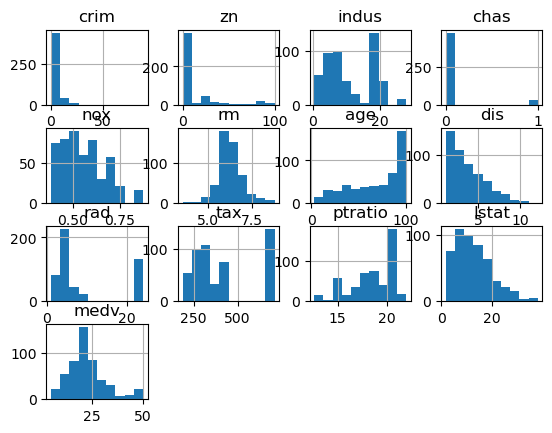

In [6]:
# Histograms.  Do they look "healthy"?  (Are the skewed in one direction?  Are they bimodal? 
# For OLS, you really want to have "Gaussian shaped" histograms, and not all features have this property here.
# At this point we just make a note of this, later you can try to improve the outcome by manipulating the
# features. 
df.hist()

In [7]:
# Are there missing values?  Look at the "Count" row to see how many entries are available for each column.
# Verify that there are no missing values.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##  We are ready to try our first go at OLS.  In the next code cell, you will learn how to use sklearn's OLS by a toy example.  Please carefully inspect this toy example, and make sure you understand what is going on, especially the process of "fitting" (on the training data) and "predicting" (on both training and validation).  Repeat the same process below on the Boston data, using medv as the target.

In [8]:
### Toy Example (synthetic) ordinary linear regression (OLS)
import numpy as np
from sklearn.linear_model import LinearRegression
x1 = np.random.rand(100)
x2 = np.random.rand(100)
data_train = pd.DataFrame({
    'x1' : np.random.rand(100)*10,
    'x2' : np.random.rand(100)*10,
})
data_test = pd.DataFrame({
    'x1' : np.random.rand(100)*10,
    'x2' : np.random.rand(100)*10,
})

# Synthetically create a label that is a close to being a linear combination of the two features, plus some "noise".
y_train = data_train['x1'] + 2 * data_train['x2'] + np.random.rand(100)*10
y_test = data_test['x1'] + 2 * data_test['x2'] + np.random.rand(100)*10

lr = LinearRegression()
lr.fit(data_train, y_train)
print (f"Train R^2 score: {lr.score(data_train, y_train)}")
print (f"Test R^2 score: {lr.score(data_test, y_test)}")

# Get predictions
data_train['y_predicted'] = lr.predict(data_train)
data_test['y_predicted'] = lr.predict(data_test)


## In order to do "Ridge regression" (L2 regularization)
# from sklearn.linear_model import Ridge
# ridge_lr = Ridge(alpha=....)
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
## Lasso (L1 regularization)
# from sklearn.linear_model import Lasso
# lasso_lr = Lasso(alpha=....)
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


Train R^2 score: 0.8409576598569708
Test R^2 score: 0.8345160101580142


## After making sure you understand the example, go ahead and run OLS on the Boston data, with medv as the target. First you will need to split the data to train (in this case, 80%) and test (the remaining 20%). Output the R-squared score of the model on both the training and on the test set, as well as the MSE on both.  You can use sklearn.metrics.r2_score for getting the R2 score, or do it as above using the trained LinearRegression object. You can use sklearn.metrics.mean_squared_error for the MSE.  Refer to the documentation of sklearn for usage of both.


In [9]:
# No missing values, all features numerical, let's try OLS.  
# First, let's do standars scaling of the variables.
# you code here...

from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['medv'])  # Features
y = df['medv']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))[:,0]


In [10]:
# Split the data into train and test
# your code here...

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("training set size:", len(X_train))
print("test set size:", len(X_test))

training set size: 404
test set size: 102


In [11]:
# Train the linear regression algorithm on the training set, compute MSE and R2 on both training and test
# Your code here...

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)

# MSE and R2 on tr set 
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# MSE and R2 on test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Training set:")
print(f"MSE: {mse_train}")
print(f"R^2 score: {r2_train}")
print("\nTest set:")
print(f"MSE: {mse_test}")
print(f"R^2 score: {r2_test}")




Training set:
MSE: 22.60428647941742
R^2 score: 0.739801993681731

Test set:
MSE: 22.777708563866053
R^2 score: 0.6893967884614758


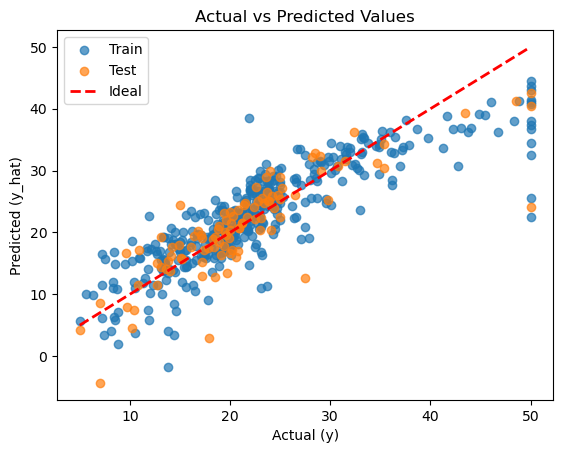

In [12]:
# A good way to visualize the error structure is to plot the label y against the predicted (y-hat) in the same plot.
# Do this for both train and test and inspect the result.  Do the residuals seem to be evenly distributed across
# the range of y values, or are they higher when y is high?  Perhaps they are  higher when y is low?

import matplotlib.pyplot as plt

# Scatter plot for training and test set
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.7)

# Plot ideal line (y = x)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='red', linestyle='--', linewidth=2, label='Ideal')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual (y)')
plt.ylabel('Predicted (y_hat)')
plt.legend()
plt.show()


## The goal of the next part is to try to create a "sweet spot" plot with ridge regression, using the alpha parameter as a model complexity knob.  To make the plot clearer, first chop off everything but the first 50 rows of X_train and y_train (this is not something you want to do in general, it is just to get the plot), but store the chopped version in a different variable, because you will need the full X_train and y_train later.  In a loop with alpha in 0,1,2,3,...,49 train a linear Ridge regression (see comments in the toy example above for instructions), and store both the training R2 metric (or MSE) and the test R2 metric (or MSE) in arrays.  There should be a total of 50 evaluation metrics for both training and testing.  Now plot the evaluation metric for the training data, against the alpha parameter (in blue), and the same for the testing data (in red).  Does the sweet-splot pattern emerge?

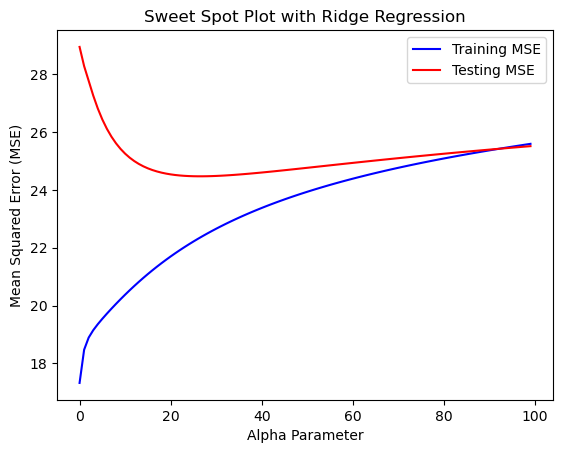

In [13]:
# Your code here...
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Chop off everything but the first 100 rows
X_train_chopped = X_train[:100]
y_train_chopped = y_train[:100]

# Step 2: Train Ridge regression with different alpha values
alpha_values = np.arange(0, 100)
train_metrics = []
test_metrics = []

for alpha in alpha_values:
    # Initialize and fit a Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_chopped, y_train_chopped)
    
    # Predictions on training set
    y_train_pred = ridge.predict(X_train_chopped)
    # Predictions on test set
    y_test_pred = ridge.predict(X_test)
    
    # Compute metrics for training and test sets
    train_metric = mean_squared_error(y_train_chopped, y_train_pred)
    test_metric = mean_squared_error(y_test, y_test_pred)
    
    # Store metrics in arrays
    train_metrics.append(train_metric)
    test_metrics.append(test_metric)

# Step 3: Plot the evaluation metric against the alpha parameter
plt.plot(alpha_values, train_metrics, label='Training MSE', color='blue')
plt.plot(alpha_values, test_metrics, label='Testing MSE', color='red')
plt.xlabel('Alpha Parameter')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Sweet Spot Plot with Ridge Regression')
plt.legend()
plt.show()



## Finally in the code cells before, try to get a better result (than the OLS experiment) by possibly manipulating features, using Ridge/Lasso with various parameters etc. You are free to try everything you have learned so far.  Do not use the chopped training data from the last step - use the enire

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression with various alpha values
ridge_alpha_values = [0.1, 1.0, 10.0, 100.0]
for alpha in ridge_alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    print(f'Ridge with alpha={alpha}: MSE = {mean_squared_error(y_test, y_pred)}, R^2 = {r2_score(y_test, y_pred)}')

# Lasso regression with various alpha values
lasso_alpha_values = [0.1, 1.0, 10.0, 100.0]
for alpha in lasso_alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    print(f'Lasso with alpha={alpha}: MSE = {mean_squared_error(y_test, y_pred)}, R^2 = {r2_score(y_test, y_pred)}')


Ridge with alpha=0.1: MSE = 22.78105306229732, R^2 = 0.6893511819444365
Ridge with alpha=1.0: MSE = 22.811118721558383, R^2 = 0.6889411981966277
Ridge with alpha=10.0: MSE = 23.09257974894586, R^2 = 0.6851031168205156
Ridge with alpha=100.0: MSE = 24.531560658499878, R^2 = 0.665480770235612
Lasso with alpha=0.1: MSE = 24.413604757305954, R^2 = 0.6670892499309258
Lasso with alpha=1.0: MSE = 27.35383028948104, R^2 = 0.6269955113364347
Lasso with alpha=10.0: MSE = 75.04543037399255, R^2 = -0.023340500652033302
Lasso with alpha=100.0: MSE = 75.04543037399255, R^2 = -0.023340500652033302


## 'sweet spot' with LASSO regression

Lasso with alpha=0.1: Number of non-zero coefficients = 10
Lasso with alpha=1.0: Number of non-zero coefficients = 5
Lasso with alpha=10.0: Number of non-zero coefficients = 0
Lasso with alpha=50.0: Number of non-zero coefficients = 0
Lasso with alpha=100.0: Number of non-zero coefficients = 0


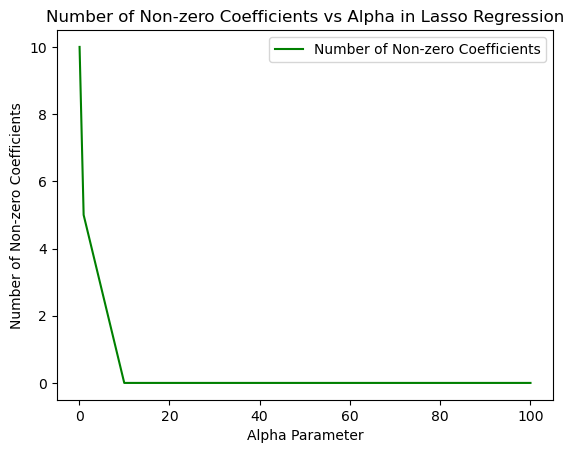

In [18]:
# Run Lasso regression with different alpha values and print the number of non-zero coefficients
alpha_values = [0.1, 1.0, 10.0, 50.0, 100.0]
lasso_nonzero_coeffs = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_nonzero_coeffs.append(np.count_nonzero(lasso.coef_))
    print(f'Lasso with alpha={alpha}: Number of non-zero coefficients = {np.count_nonzero(lasso.coef_)}')
    
# Plot the number of non-zero coefficients against alpha
plt.plot(alpha_values, lasso_nonzero_coeffs, label='Number of Non-zero Coefficients', color='green')
plt.xlabel('Alpha Parameter')
plt.ylabel('Number of Non-zero Coefficients')
plt.title('Number of Non-zero Coefficients vs Alpha in Lasso Regression')
plt.legend()
plt.show()

In [19]:
# Replace the target variable y with a binary target variable y_binary
y_median = y_train.median()
y_binary_train = np.where(y_train > y_median, 1, -1)
y_binary_test = np.where(y_test > y_median, 1, -1)

# Run logistic regression using y_binary as the target variable
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Fit the model on training data
logistic_model.fit(X_train_scaled, y_binary_train)

# Predictions on training set
y_binary_train_pred = logistic_model.predict(X_train_scaled)

# Predictions on test set
y_binary_test_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_binary_train, y_binary_train_pred)
accuracy_test = accuracy_score(y_binary_test, y_binary_test_pred)

# Print accuracy scores
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")


Training Accuracy: 0.8861386138613861
Test Accuracy: 0.8823529411764706
